<a href="https://colab.research.google.com/github/jhbeann/fast_deep/blob/main/Pie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!ls - al '/gdrive/My Drive/data'

ls: cannot access '-': No such file or directory
ls: cannot access 'al': No such file or directory
'/gdrive/My Drive/data':
data_202001.csv  data_2020.csv				  TCS_영업소간통행시간_1시간_1개월_202003
data_202002.csv  TCS_영업소간통행시간_1시간_1개월_202001
data_202003.csv  TCS_영업소간통행시간_1시간_1개월_202002


# 2. Korean Characters

In [3]:
# 한글 폰트 깨질 때
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

런타임 다시시작

In [4]:
# import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [5]:
plt.rc('font',family ='NanumBarunGothic')

# 3. Load data

In [6]:
import pandas as pd

In [7]:
#load a file under "data" folder
file ="/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [8]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


# 4. 집계시

In [10]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [11]:
# create data_06_22 dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [12]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [13]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [14]:
# store index of data_06_22_counting into x
x = data_06_22_counting.index

In [15]:
labels = [str(i) + '시' for i in x]
labels

['14시',
 '12시',
 '15시',
 '13시',
 '11시',
 '10시',
 '16시',
 '17시',
 '9시',
 '18시',
 '8시',
 '19시',
 '20시',
 '7시',
 '21시',
 '22시',
 '6시']

In [16]:
# 앞에 두개 0.1로 튀어나오기
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
# Store values of data_06_22_counting into values
values = data_06_22_counting.values

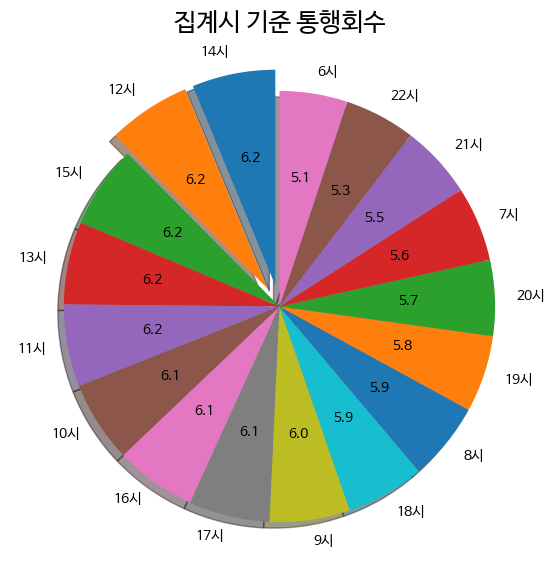

In [18]:
# Configure figure size
plt.figure(figsize=(7,7))
# Creae pie Chart
plt.pie(values, explode=explode, labels=labels, startangle = 90, shadow=True, autopct='%.1f') # autopct 소수점 한자리까지
# Generate labels and title
plt.title("집계시 기준 통행회수",fontsize=18)
# Show plot
plt.show()

# 5. 도착영업소코드


In [19]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [20]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [21]:
x = data_destination_counting.index

In [22]:
labels = [str(i) for i in x]

In [23]:
labels

['105', '110', '115', '140', '130', '135', '125', '120']

In [24]:
labels = ['기흥','목천','대전','부산','동김천','경주','남구미','황간']

In [25]:
explode = [0.2,0.1,0,0,0,0,0,0]

In [26]:
values = data_destination_counting.values

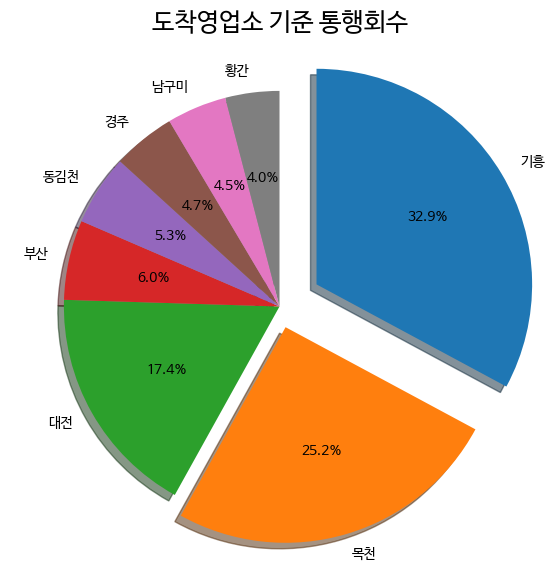

In [27]:
# Configure figure size
plt.figure(figsize=(7,7))
# Creae pie Chart
plt.pie(values, explode=explode, labels=labels, startangle = 90, shadow=True, autopct='%.1f%%', counterclock=False) # 시계방향
# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
# Show plot
plt.show()